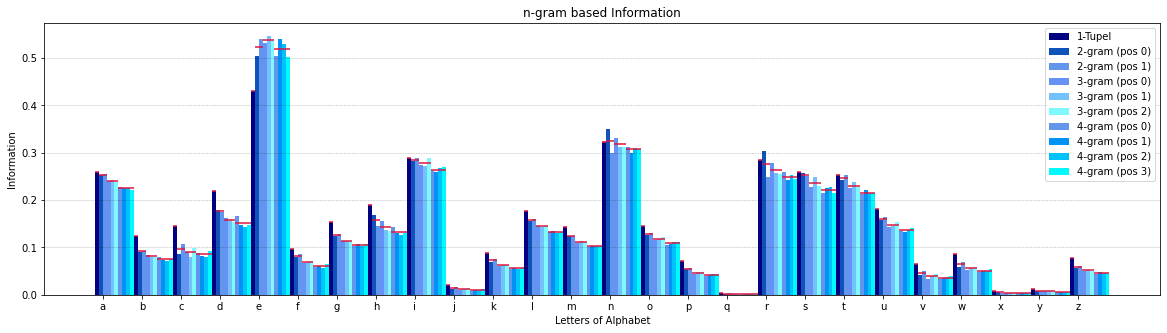

In [4]:
#ÄÜÖß # from datei
from math import log
from math import fsum
import matplotlib.pyplot as plt
import numpy as np

# ergebnis-listen
klaslist = [0]*26
pos1list = [0]*26
pos2list = [0]*26
avg2list = [0]*26

pos31list = [0]*26
pos32list = [0]*26
pos33list = [0]*26
avg3list = [0]*26
leg_list = [0]*26

pos41list = [0]*26
pos42list = [0]*26
pos43list = [0]*26
pos44list = [0]*26
avg4list = [0]*26

#########
### 2 ### & 1 (klas)
#########

grams = [[0 for x in range(26)] for y in range(26)]
datei = open('de_2_gram.txt','r')
num=0
sumall=0

for zeile in datei:
    letter, num = zeile.split()
    if(ord(letter[0])-ord('A')<26 and ord(letter[1])-ord('A')<26):
        grams[ord(letter[0])-ord('A')][ord(letter[1])-ord('A')] = int(num)
        sumall += int(num)

for i in range(26):
    for j in range(26):
        val = grams[i][j]
        if(val!=0):
            pos1list[i] += val/sumall*log(sumall/val,2)/2 # schon VOR-GEWICHTET für Durchschnitt
            pos2list[j] += val/sumall*log(sumall/val,2)/2 # schon VOR-GEWICHTET für Durchschnitt

for i in range(26):
    inf = 0
    for j in range(26):
        inf += grams[i][j]
    klaslist[i] = inf/sumall*log(sumall/inf,2)

##print(fsum(klaslist))

#for j in range(len(bigrams)):
#    inf = 0
#    for i, val in enumerate(bigrams[j]):
#        inf+=val
#    klaslist.append(inf/10000*log(10000/inf,2))

#########
### 3 ### & leg (legende)
#########

grams = [[[0 for x in range(26)] for y in range(26)] for z in range(26)]
datei = open('de_3_gram.txt','r')
num=0
sumall=0
for zeile in datei:
    letter, num = zeile.split()
    if(ord(letter[0])-ord('A')<26 and ord(letter[1])-ord('A')<26 and ord(letter[2])-ord('A')<26):
        grams[ord(letter[0])-ord('A')][ord(letter[1])-ord('A')][ord(letter[2])-ord('A')] = int(num)
        sumall += int(num)

for i in range(26):
    for j in range(26):
        for k in range(26):
            val = grams[i][j][k]
            if(val!=0):
                pos31list[i] += val/sumall*log(sumall/val,2)/3 # schon VOR-GEWICHTET für Durchschnitt
                pos32list[j] += val/sumall*log(sumall/val,2)/3 # schon VOR-GEWICHTET für Durchschnitt
                pos33list[k] += val/sumall*log(sumall/val,2)/3 # schon VOR-GEWICHTET für Durchschnitt

for i in range(26):
    leg_list[i] = chr(ord('a')+i)


#########
### 4 ###
#########

grams = [[[[0 for x in range(26)] for y in range(26)] for z in range(26)] for zz in range(26)]
datei = open('de_4_gram.txt','r')
num=0
sumall=0
for zeile in datei:
    letter, num = zeile.split()
    if(ord(letter[0])-ord('A')<26 and ord(letter[1])-ord('A')<26 and ord(letter[2])-ord('A')<26 and ord(letter[3])-ord('A')<26):
        grams[ord(letter[0])-ord('A')][ord(letter[1])-ord('A')][ord(letter[2])-ord('A')][ord(letter[3])-ord('A')] = int(num)
        sumall += int(num)
#print(grams)

for i in range(26):
    for j in range(26):
        for k in range(26):
            for l in range(26):
                val = grams[i][j][k][l]
                if(val!=0):
                    pos41list[i] += val/sumall*log(sumall/val,2)/4 # schon VOR-GEWICHTET für Durchschnitt
                    pos42list[j] += val/sumall*log(sumall/val,2)/4 # schon VOR-GEWICHTET für Durchschnitt
                    pos43list[k] += val/sumall*log(sumall/val,2)/4 # schon VOR-GEWICHTET für Durchschnitt
                    pos44list[l] += val/sumall*log(sumall/val,2)/4 # schon VOR-GEWICHTET für Durchschnitt


###########
### avg ###
###########

for i in range(26):
    avg2list[i] = (pos1list[i] + pos2list[i])/2 ### np.average(data, axis=0)
    avg3list[i] = (pos31list[i] + pos32list[i] + pos33list[i])/3
    avg4list[i] = (pos41list[i] + pos42list[i] + pos43list[i] + pos44list[i])/4
    
# plot
fig, ax = plt.subplots(figsize=(20,5))
width = 0.1 # width of bar
x = np.arange(26)
ax.bar(x, klaslist, width, color='#000080', label='1-Tupel')
ax.bar(x + width, pos1list, width, color='#0F52BA', label='2-gram (pos 0)')
ax.bar(x + (2 * width), pos2list, width, color='#6495ED', label='2-gram (pos 1)')
ax.bar(x + (3 * width), pos31list, width, color='#6593F5', label='3-gram (pos 0)')
ax.bar(x + (4 * width), pos32list, width, color='#73C2FB', label='3-gram (pos 1)')
ax.bar(x + (5 * width), pos33list, width, color='#7DF9FF', label='3-gram (pos 2)')
ax.bar(x + (6 * width), pos41list, width, color='#6495ED', label='4-gram (pos 0)')
ax.bar(x + (7 * width), pos42list, width, color='#0093F5', label='4-gram (pos 1)')
ax.bar(x + (8 * width), pos43list, width, color='#00C2FB', label='4-gram (pos 2)')
ax.bar(x + (9 * width), pos44list, width, color='#00F9FF', label='4-gram (pos 3)')
ax.set_ylabel('Information')
#ax.set_ylim(0,25)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(leg_list)
ax.set_xlabel('Letters of Alphabet')
ax.set_title('n-gram based Information')
ax.legend()
for i in range(26):
    plt.hlines(y=klaslist[i], xmin=i*width*10-0.5*width,         xmax=i*width*10+width*1-0.5*width, colors='crimson')
    plt.hlines(y=avg2list[i], xmin=i*width*10+width*1-0.5*width, xmax=i*width*10+width*3-0.5*width, colors='crimson')
    plt.hlines(y=avg3list[i], xmin=i*width*10+width*3-0.5*width, xmax=i*width*10+width*6-0.5*width, colors='crimson')
    plt.hlines(y=avg4list[i], xmin=i*width*10+width*6-0.5*width, xmax=i*width*10+width*10-0.5*width, colors='crimson')

plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#fig.tight_layout()
plt.show()

